<a href="https://colab.research.google.com/github/Meichen1029/660Final/blob/main/milestone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install a new package
!pip install wquantiles

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 新段落

In [ ]:
#import pandas:
import pandas as pd
#import numpy:
import numpy as np
#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import seaborn as sns

#several others
import scipy
import sklearn
import graphviz

In [ ]:
#enable the ability to use R code
!pip3 install rpy2
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318074 sha256=ff5a5e4311bed69ae76b41602dba84fd98fcea5b5cdf1288423376790d28efd1
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [ ]:
%%R
install.packages("vioplot")
install.packages("corrplot")
install.packages("gmodels")
install.packages("matrixStats")

(as ‘lib’ is unspecified)



















	‘/tmp/RtmpUkmSjm/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUkmSjm/downloaded_packages’

(as ‘lib’ is unspecified)



















	‘/tmp/RtmpUkmSjm/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUkmSjm/downloaded_packages’



**Exploratory Data Analysis**

In [ ]:
from google.colab import files
files.upload()

In [ ]:
#Python
co = pd.read_csv('/content/Costco Supply co.csv')

In [ ]:
co.head()

,#,Universal Id,Alt Universal Id,Quantity,Retail Cost,Unit Cost,Description
0,1,COSTCO1729970,1729970,808,808.00,1.000000,TRAVELPRO TRAVELWARE COSTCO NEXT
1,2,4376501507,1415862,641,57683.59,89.990000,VORNADO AUTO WHOLE ROOM HEATER FY20-21 P27 VOR...
2,3,4601377120,2415867,557,39154.43,70.295206,LASKO REVOLUTION CERAMIC HEATER FY23-24 P25 LA...
3,4,85002839302,1590166,496,79355.04,159.990000,DR HEATER CARBON INFRARED PATIO HEATER P21
4,5,76131815318,2452692,464,21095.36,45.464138,REVLON VOLUMIZER PLUS HAIRDRYER RVDR5318CT P144


In [ ]:
co.describe

In [ ]:
co['Quantity'].mean()

8.960082587749485

In [ ]:
co['Unit Cost'].mean()

128.97204857193563

In [ ]:
trim_mean(co['Quantity'], 0.1)

3.2037833190025795

In [ ]:
trim_mean(co['Unit Cost'], 0.1)

56.91197569995272

In [ ]:
co['Quantity'].median()

2.0

In [ ]:
co['Unit Cost'].median()

32.99

In [ ]:
np.average(co['Unit Cost'], weights=co['Quantity'])

70.7938620478205

In [ ]:
wquantiles.median(co['Unit Cost'], weights=co['Quantity'])

34.99

**Estimates of Variability or Dispersion**

In [ ]:
co['Quantity'].std()

34.245330194507844

In [ ]:
co['Retail Cost'].std()

2661.0471906064627

In [ ]:
co['Unit Cost'].std()

364.4846663041354

In [ ]:
co['Quantity'].quantile(0.75) - co['Quantity'].quantile(0.25)

4.0

In [ ]:
co['Retail Cost'].quantile(0.75) - co['Retail Cost'].quantile(0.25)

344.59749999999997

In [ ]:
co['Unit Cost'].quantile(0.75) - co['Unit Cost'].quantile(0.25)

74.0

In [ ]:
robust.scale.mad(co['Quantity'])

1.482602218505602

In [ ]:
robust.scale.mad(co['Retail Cost'])

121.5585558952743

In [ ]:
robust.scale.mad(co['Unit Cost'])

31.134646588617642

**Exploring the Data Distribution**

In [ ]:
co['Quantity'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05     1.0
0.25     1.0
0.50     2.0
0.75     5.0
0.95    32.0
Name: Quantity, dtype: float64

In [ ]:
co['Retail Cost'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05      10.7900
0.25      29.9900
0.50      98.9800
0.75     374.5875
0.95    2733.2850
Name: Retail Cost, dtype: float64

In [ ]:
co['Unit Cost'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05      8.165
0.25     15.990
0.50     32.990
0.75     89.990
0.95    549.990
Name: Unit Cost, dtype: float64

In [ ]:
co['Quantity'].describe()

count    2906.000000
mean        8.960083
std        34.245330
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       808.000000
Name: Quantity, dtype: float64

In [ ]:
co['Retail Cost'].describe()

count     2906.000000
mean       634.318851
std       2661.047191
min          0.010000
25%         29.990000
50%         98.980000
75%        374.587500
max      79355.040000
Name: Retail Cost, dtype: float64

In [ ]:
co['Unit Cost'].describe()

count    2906.000000
mean      128.972049
std       364.484666
min         0.010000
25%        15.990000
50%        32.990000
75%        89.990000
max      7899.990000
Name: Unit Cost, dtype: float64

Text(0, 0.5, 'Quantity')

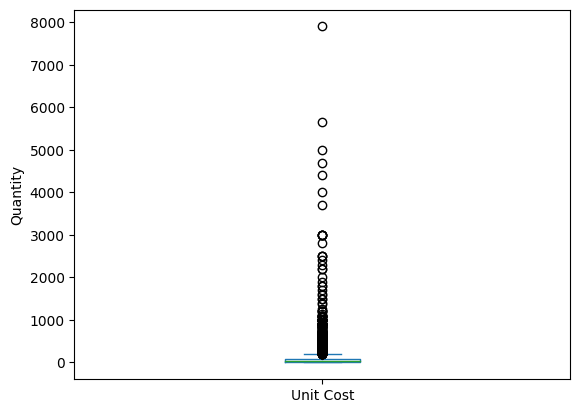

In [ ]:
ax = (co['Unit Cost']).plot.box()
ax.set_ylabel('Quantity')

In [ ]:
binnedPopulation = pd.cut(co['Retail Cost'], 10)

In [ ]:
binnedPopulation.value_counts()

(-79.345, 7935.513]       2874
(7935.513, 15871.016]       22
(15871.016, 23806.519]       5
(23806.519, 31742.022]       1
(31742.022, 39677.525]       1
(39677.525, 47613.028]       1
(55548.531, 63484.034]       1
(71419.537, 79355.04]        1
(47613.028, 55548.531]       0
(63484.034, 71419.537]       0
Name: Retail Cost, dtype: int64

In [ ]:
binnedPopulationU = pd.cut(co['Unit Cost'], 10)
binnedPopulationU.value_counts()

(-7.89, 790.008]        2817
(790.008, 1580.006]       63
(2370.004, 3160.002]      10
(1580.006, 2370.004]       9
(3950.0, 4739.998]         3
(3160.002, 3950.0]         1
(4739.998, 5529.996]       1
(5529.996, 6319.994]       1
(7109.992, 7899.99]        1
(6319.994, 7109.992]       0
Name: Unit Cost, dtype: int64

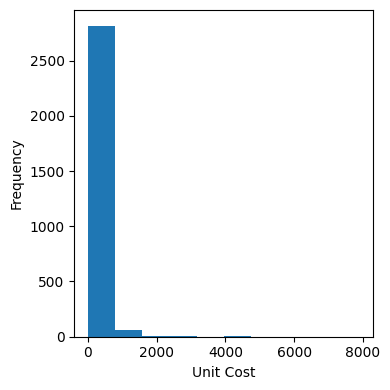

In [ ]:
#histogram
ax = (co['Unit Cost']).plot.hist(figsize=(4, 4))
ax.set_xlabel('Unit Cost')

plt.tight_layout()
plt.show()

In [ ]:
co.sort_values(['Unit Cost'],ascending=False)

,#,Universal Id,Alt Universal Id,Quantity,Retail Cost,Unit Cost,Description
1837,1838,19606610855,1646887,1,7899.99,7899.99,LOVESAC 6/8 BW LS WHITE BW LS STORAGE FY22
1836,1837,19606610853,1646897,1,5649.99,5649.99,LOVESAC 4/5 BW LS FLGSTN BW LS STORAGE FY22
2078,2079,49999650677,1573095,1,4999.99,4999.99,TOMASINO 2PC LTH RCL GRAY ABBYSON ECOM FY21 TO...
1345,1346,49999742051,1474077,2,9399.98,4699.99,TEAGAN 6PC LTR SEC GRAY TEAGAN 6PC LTR SEC ...
2102,2103,49999695543,1504483,1,4399.99,4399.99,POSITANO 3PC LTHR SET SOFA LOVE CHAIR BROWN
...,...,...,...,...,...,...,...
652,653,9661999576,522779,6,23.94,3.99,KS CRUSHED RED PEPPER 10Z T9H6 20/10Z
391,392,9661938473,384732,12,41.88,3.49,KS PURE SEA SALT 30 OZ 850G
358,359,85315600782,1692570,13,30.81,2.37,YERBAE PUMPKIN SPICE8/16Z SPARKLING ENHANCED W...
0,1,COSTCO1729970,1729970,808,808.00,1.00,TRAVELPRO TRAVELWARE COSTCO NEXT


In [ ]:
binnedPopulation = pd.cut(co['Unit Cost'], 10)
print(binnedPopulation.value_counts())

binnedPopulation.name = 'binnedPopulation'
df = pd.concat([co, binnedPopulation], axis=1)
df = df.sort_values(by='Unit Cost')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'Description': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

(-7.89, 790.008]        2817
(790.008, 1580.006]       63
(2370.004, 3160.002]      10
(1580.006, 2370.004]       9
(3950.0, 4739.998]         3
(3160.002, 3950.0]         1
(4739.998, 5529.996]       1
(5529.996, 6319.994]       1
(7109.992, 7899.99]        1
(6319.994, 7109.992]       0
Name: Unit Cost, dtype: int64


AttributeError: ignored

**Density Plots and Estimates**

**Density plot: shows the distribution of data values as a continuous line**

Text(0.5, 0, 'Unit Cost')

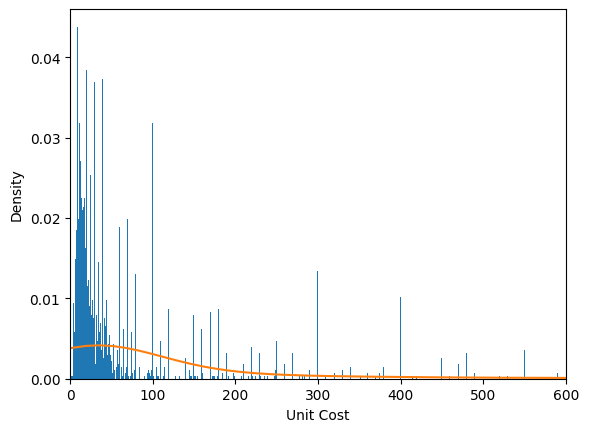

In [ ]:
ax = co['Unit Cost'].plot.hist(density=True, xlim=[0,600], bins=range(1,600))
co['Unit Cost'].plot.density(ax=ax)
ax.set_xlabel('Unit Cost')

**Binary and Categorical Data**

Text(0, 0.5, 'Count')

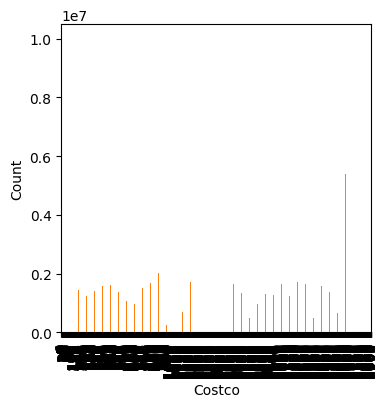

In [ ]:
ax = co.plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Costco')
ax.set_ylabel('Count')

In [ ]:
co.transpose()

**Correlation**

In [ ]:
co.corr()

<ipython-input-70-50d7cf9dfd68>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co.corr()


,#,Alt Universal Id,Quantity,Retail Cost,Unit Cost
#,1.000000,-0.041343,-0.346045,-0.252893,0.090898
Alt Universal Id,-0.041343,1.000000,0.015097,0.039597,0.031167
Quantity,-0.346045,0.015097,1.000000,0.691492,-0.041777
Retail Cost,-0.252893,0.039597,0.691492,1.000000,0.189771
Unit Cost,0.090898,0.031167,-0.041777,0.189771,1.000000


<ipython-input-71-1866ee00251f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(co.corr(), vmin=-1, vmax=1,


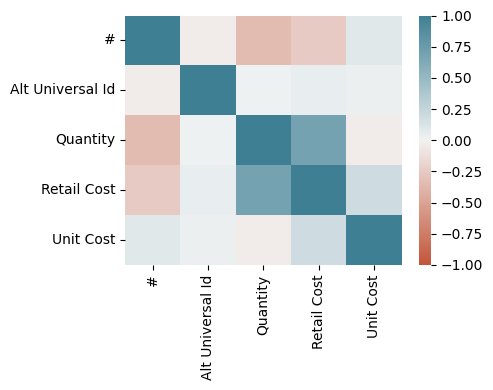

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(co.corr(), vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True), #this just changes the color scheme
                 ax=ax)

plt.tight_layout()
plt.show()

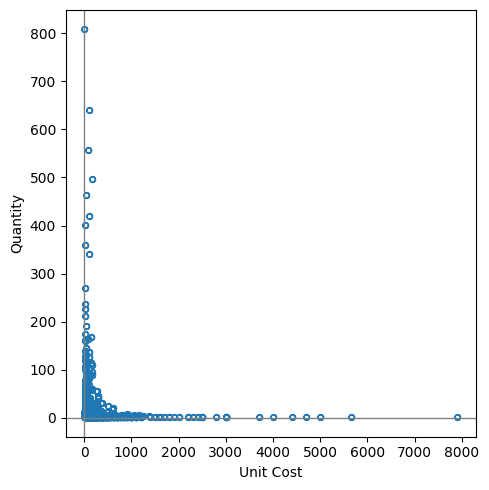

In [ ]:
ax = co.plot.scatter(x='Unit Cost', y='Quantity', figsize=(5, 5), marker='$\u25EF$')
ax.set_xlabel('Unit Cost')
ax.set_ylabel('Quantity')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

Line2D(_child2)


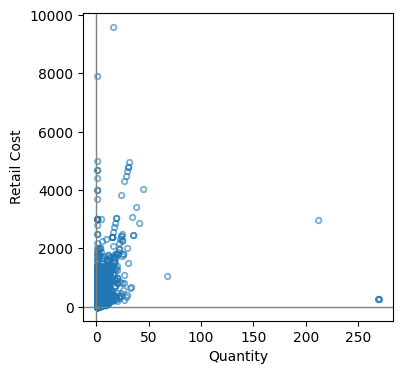

In [ ]:
ax = co.plot.scatter(x='Quantity', y='Retail Cost', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('Quantity')
ax.set_ylabel('Retail Cost')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

**Exploring Two or More Variables**

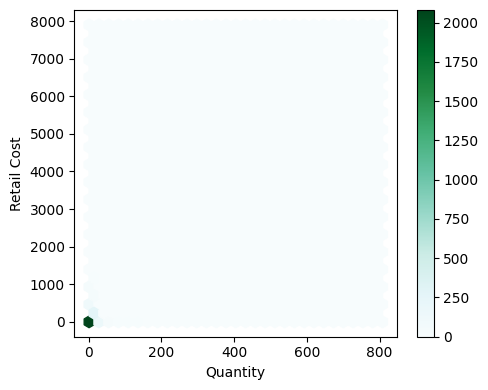

In [ ]:
#Hexagonal binning
ax = co.plot.hexbin(x='Quantity', y='Unit Cost',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Quantity')
ax.set_ylabel('Unit Cost')

plt.tight_layout()
plt.show()

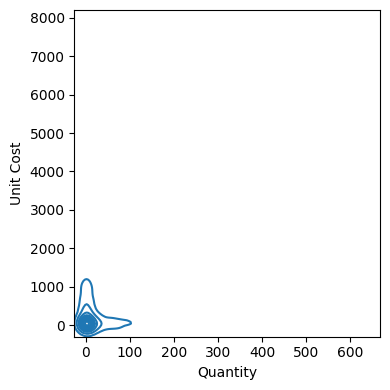

In [ ]:
#Countor plot
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=co.sample(2000), x='Quantity', y='Unit Cost', ax=ax)#using a sample of 10000
ax.set_xlabel('Quantity')
ax.set_ylabel('Unit Cost')

plt.tight_layout()
plt.show()

**Categorical Data**

In [ ]:
#table
#counts
crosstab = co.pivot_table(index='Alt Universal Id', columns='Quantity',
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

                       #                                                      \
Quantity               1      2      3      4      5     6     7     8     9   
Alt Universal Id                                                               
222                  1.0    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   
461                  1.0    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   
470                  1.0    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   
577                  NaN    1.0    NaN    NaN    NaN   NaN   NaN   NaN   NaN   
975                  1.0    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   
...                  ...    ...    ...    ...    ...   ...   ...   ...   ...   
9262015              NaN    NaN    1.0    NaN    NaN   NaN   NaN   NaN   NaN   
9595356              NaN    NaN    1.0    NaN    NaN   NaN   NaN   NaN   NaN   
9595357              1.0    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   
9993333              1.0    NaN    NaN  

**Categorical and Numeric Data**

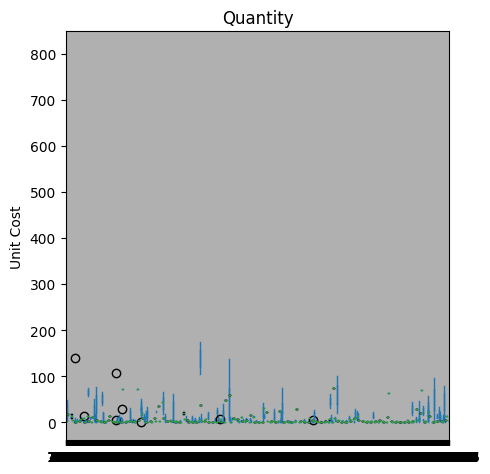

In [ ]:
co.head()
ax = co.boxplot(by='Alt Universal Id', column='Quantity',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Unit Cost')
plt.suptitle('')

plt.tight_layout()
plt.show()

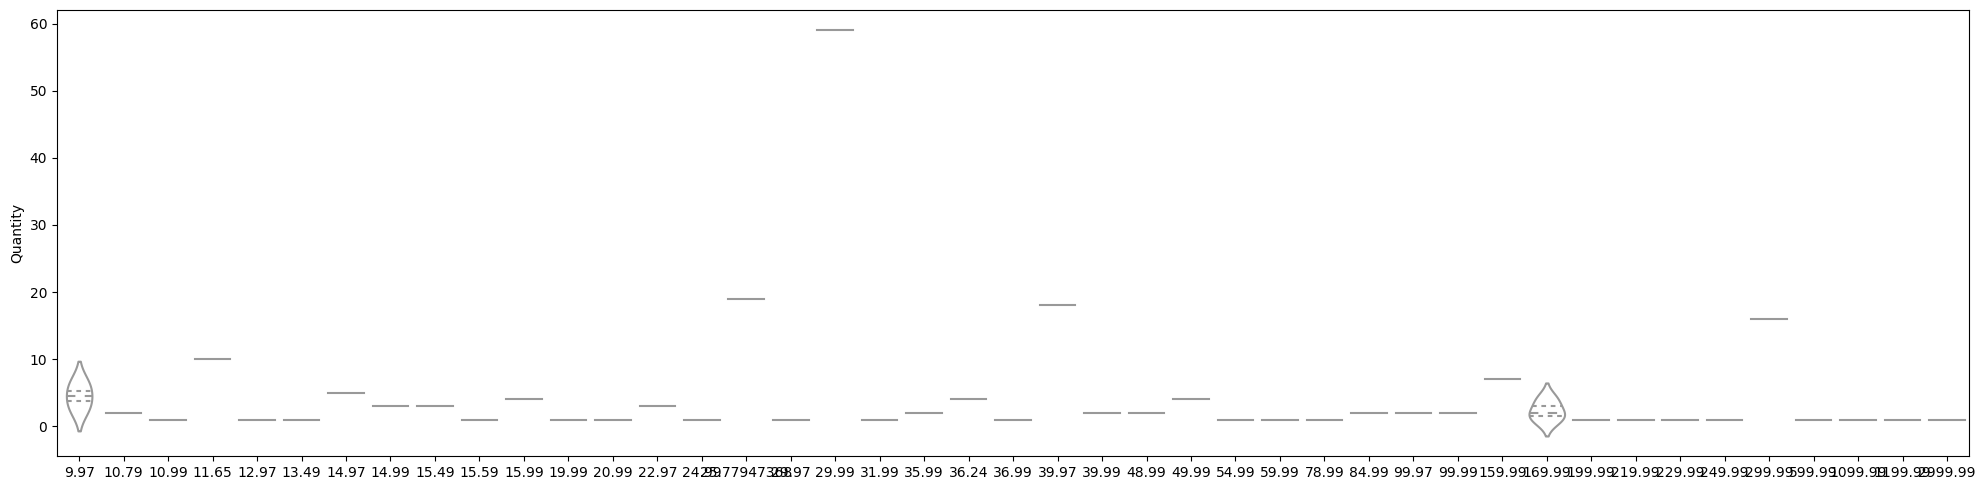

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sample_data = co['Unit Cost'].sample(50)
sns.violinplot(data=co, x=sample_data, y='Quantity',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Quantity')

plt.tight_layout()
plt.show()

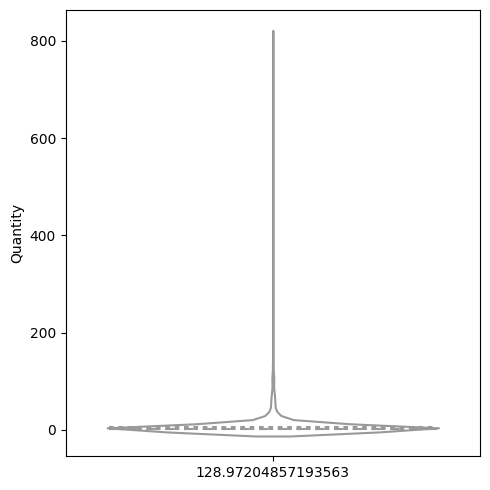

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
avg = co['Unit Cost'].mean()
data = pd.DataFrame({'Average Unit Cost': [avg] * len(co), 'Quantity': co['Quantity']})
sns.violinplot(data=data, x='Average Unit Cost', y='Quantity',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Quantity')

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(data=co, x='Quantity', y='Unit Cost',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Unit Cost')

plt.tight_layout()
plt.show()

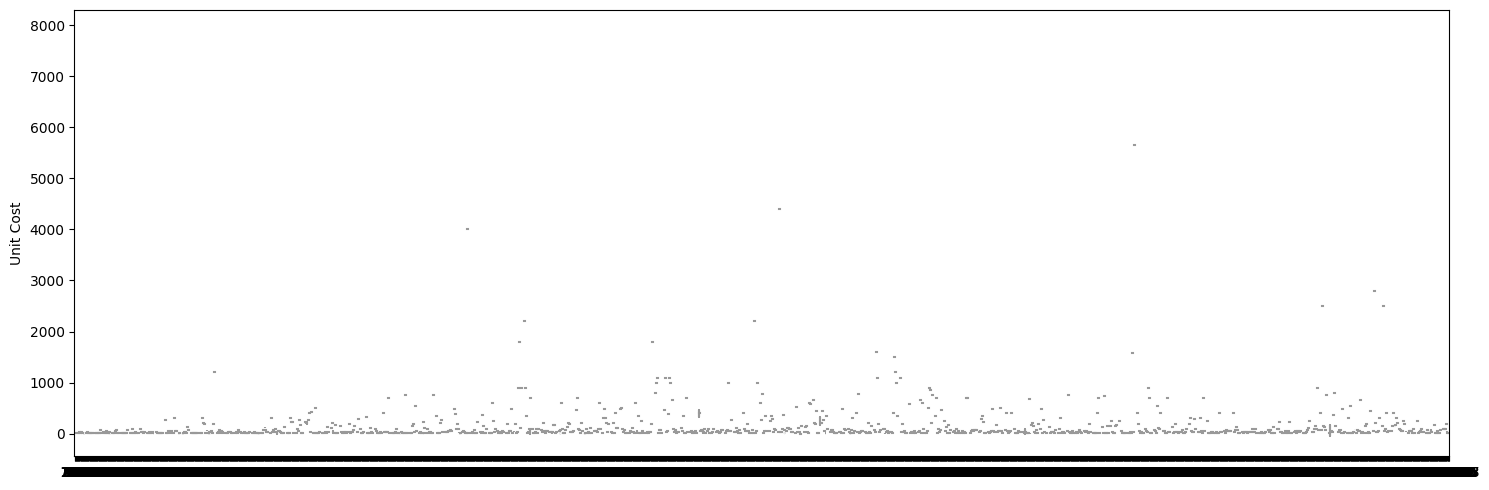

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(data=co, x='Alt Universal Id', y='Unit Cost',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Unit Cost')

plt.tight_layout()
plt.show()

**Visualizing Multiple Variables**

In [ ]:

g = sns.FacetGrid(co, col='Unit Cost', col_wrap=2)
g.map(hexbin, 'Quantity', 'Unit Cost',
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Quantity', 'Unit Cost')
g.set_titles('Costco')

plt.tight_layout()
plt.show()

**Sampling**

In [ ]:
%%R
library(dplyr)
library(tidyr)
library(ggplot2)
library(vioplot)
library(corrplot)
library(gmodels)
library(matrixStats)

In [ ]:
%%R
library(boot)
library(ggplot2)
library(dplyr)

Attaching package: ‘boot’



    dogs




In [ ]:
%%R
c <- read.csv('/content/Costco Supply co.csv')
glimpse(c)
c <- c[,1] #convert data frame to vector
head(c)

Rows: 2,906
Columns: 7
$ X.               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ Universal.Id     <chr> "COSTCO1729970", "4376501507", "4601377120", "8500283…
$ Alt.Universal.Id <int> 1729970, 1415862, 2415867, 1590166, 2452692, 1509959,…
$ Quantity         <int> 808, 641, 557, 496, 464, 420, 402, 359, 340, 271, 236…
$ Retail.Cost      <dbl> 808.00, 57683.59, 39154.43, 79355.04, 21095.36, 42255…
$ Unit.Cost        <dbl> 1.000000, 89.990000, 70.295206, 159.990000, 45.464138…
$ Description      <chr> "TRAVELPRO TRAVELWARE COSTCO NEXT", "VORNADO AUTO WHO…
[1] 1 2 3 4 5 6


**Sampling Distribution of a Statistic**

In [ ]:
%%R
# take a simple random sample
samp_data <- data.frame(cos=sample(c, 1000),
                        type='data_dist')
head(samp_data)
glimpse(samp_data)

In [ ]:
%%R
# take a sample of means of 5 values
samp_mean_05 <- data.frame(
  cos = tapply(sample(c, 100*5),
                  rep(1:100, rep(5, 100)), FUN=mean),
  type = 'mean_of_5')

glimpse(samp_mean_05)

In [ ]:
%%R
# take a sample of means of 20 values
samp_mean_20 <- data.frame(
  cos = tapply(sample(c, 100*20),
                  rep(1:100, rep(20, 100)), FUN=mean),
  type = 'mean_of_20')
glimpse(samp_mean_20)

In [ ]:
%%R
#bind the data.frames and convert type to a factor
cos <- rbind(samp_data, samp_mean_05, samp_mean_20)
cos$type <- factor(cos$type,
                     levels=c('data_dist', 'mean_of_5', 'mean_of_20'),
                     labels=c('Data', 'Mean of 5', 'Mean of 20'))

glimpse(cos)

Rows: 1,200
Columns: 2
$ cos  <dbl> 1815, 816, 2815, 1894, 1361, 2697, 47, 1336, 1912, 2145, 1131, 27…
$ type <fct> Data, Data, Data, Data, Data, Data, Data, Data, Data, Data, Data,…


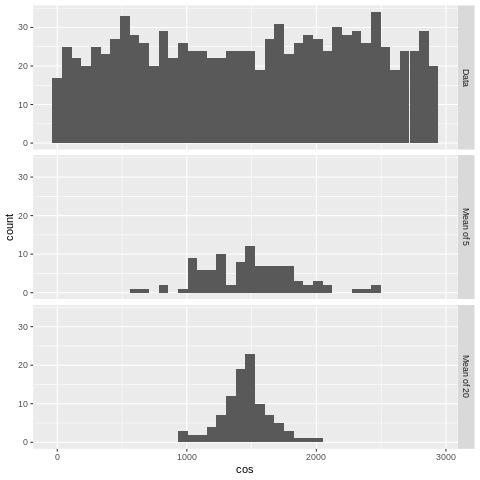

In [ ]:
%%R
ggplot(cos, aes(x=cos)) +
  geom_histogram(bins=40) +
  facet_grid(type ~ .)

**The Bootstrap**

In [ ]:
%%R
glimpse(c)

 int [1:2906] 1 2 3 4 5 6 7 8 9 10 ...


In [ ]:
%%R
library(boot)
stat_fun <- function(x, idx) median(x[idx]) #function calculate the median of each sample
boot_obj <- boot(c, R=1000, statistic=stat_fun)

In [ ]:
%%R
boot_obj


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = c, statistic = stat_fun, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*   1453.5  0.5935    26.56607


In [ ]:
#check this
%%R
summary(c)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   727.2  1453.5  1453.5  2179.8  2906.0 


In [ ]:
%%R
names(boot_obj)

 [1] "t0"        "t"         "R"         "data"      "seed"      "statistic"
 [7] "sim"       "call"      "stype"     "strata"    "weights"  


In [ ]:
%%R
glimpse(boot_obj)

List of 11
 $ t0       : num 1454
 $ t        : num [1:1000, 1] 1452 1474 1476 1502 1482 ...
 $ R        : num 1000
 $ data     : int [1:2906] 1 2 3 4 5 6 7 8 9 10 ...
 $ seed     : int [1:626] 10403 510 -1349516235 -518591585 1270751926 -804644616 -182238409 -354942184 -396957202 -948757692 ...
 $ statistic:function (x, idx)  
 $ sim      : chr "ordinary"
 $ call     : language boot(data = c, statistic = stat_fun, R = 1000)
 $ stype    : chr "i"
 $ strata   : num [1:2906] 1 1 1 1 1 1 1 1 1 1 ...
 $ weights  : num [1:2906] 0.000344 0.000344 0.000344 0.000344 0.000344 ...
 - attr(*, "class")= chr "boot"
 - attr(*, "boot_type")= chr "boot"


In [ ]:
%%R
summary(boot_obj$t)

       V1      
 Min.   :1369  
 1st Qu.:1436  
 Median :1454  
 Mean   :1454  
 3rd Qu.:1473  
 Max.   :1543  


**Confidence Intervals**

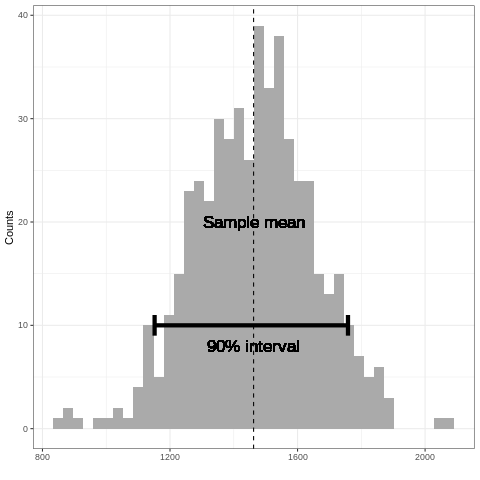

In [ ]:
%%R
set.seed(7)
sample20 <- sample(c, 20)
sampleMean <- mean(sample20)

stat_fun <- function(x, idx) mean(x[idx])
boot_obj <- boot(sample20, R=500, statistic=stat_fun)
boot_ci <- boot.ci(boot_obj, conf=0.9, type='basic')
X <- data.frame(mean=boot_obj$t)
ci90 <- boot_ci$basic[4:5]
ci <- data.frame(ci=ci90, y=c(9, 11))
ci

ggplot(X, aes(x=mean)) +
    geom_histogram(bins=40, fill='#AAAAAA') +
    geom_vline(xintercept=sampleMean, linetype=2) +
    geom_path(aes(x=ci, y=10), data=ci, size=2) +
    geom_path(aes(x=ci90[1], y=y), data=ci, size=2) +
    geom_path(aes(x=ci90[2], y=y), data=ci, size=2) +
    geom_text(aes(x=sampleMean, y=20, label='Sample mean'), size=6) +
    geom_text(aes(x=sampleMean, y=8, label='90% interval'), size=6) +
    theme_bw() +
    labs(x='', y='Counts')